## Import important Libraries

In [36]:
import arviz as az
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import pymc3 as pm
import seaborn
import theano.tensor as tt
import warnings
from IPython.core.pylabtools import figsize
import seaborn as sns
from sklearn.metrics import (roc_curve, roc_auc_score, confusion_matrix, accuracy_score, f1_score, 
                             precision_recall_curve) 
from sklearn.metrics import confusion_matrix


import seaborn as sb
import matplotlib.pyplot as plt    
import seaborn as sns
sns.set(color_codes=True, font_scale=1.2)
%matplotlib inline
%matplotlib inline
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from matplotlib import pyplot
from sklearn.decomposition import PCA 
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

## Load Data

In [82]:
df=pd.read_csv('medicalfraud.csv')
df.sample(5)

,amount_paid_to_date,number_presc_to_date,max_presc_to_date,max_presc_per_doctor,max_presc_per_hospital,max_presc_per_year,id,FRAUD_LABEL,amount_paid_per_year,amount_paid_per_hospital,amount_paid_per_doctor,amount_paid_to_prescription,amount_paid_total,number_presc_per_year,number_presc_per_hospital,number_presc_per_doctor,number_presc_to_prescription,number_presc_total
125,143.776783,42,0,1,65,65,28,True,80.894344,58.627519,63.305990,49.978772,575.107131,251,90,37,33,575
119,147.970497,42,0,1,73,74,28,True,291.591066,92.957323,64.401484,72.731303,591.881989,367,41,59,60,592
21,100.560369,5,0,1,44,20,46,False,165.381805,56.711410,37.704286,31.032453,402.241476,147,27,38,44,402
9,109.627164,28,1,0,25,31,228,False,152.178331,39.839671,51.995220,21.237536,438.508656,251,44,44,51,439
14,104.663020,5,0,1,25,32,193,False,183.604412,41.199200,29.051992,40.153982,418.652078,253,65,22,19,419


## Encoding label column

In [86]:
from sklearn.preprocessing import LabelEncoder
labelencoder = LabelEncoder()

In [87]:
df['FRAUD_LABEL'] = labelencoder.fit_transform(df['FRAUD_LABEL'])
df

,amount_paid_to_date,number_presc_to_date,max_presc_to_date,max_presc_per_doctor,max_presc_per_hospital,max_presc_per_year,id,FRAUD_LABEL,amount_paid_per_year,amount_paid_per_hospital,amount_paid_per_doctor,amount_paid_to_prescription,amount_paid_total,number_presc_per_year,number_presc_per_hospital,number_presc_per_doctor,number_presc_to_prescription,number_presc_total
0,100.000000,0,1,1,0,0,21,0,109.111328,71.316356,24.658738,40.935309,400.000000,120,37,30,35,400
1,100.588010,9,1,1,9,9,34,0,0.942975,48.316478,27.854219,24.471927,402.352042,285,55,35,46,402
2,100.402561,0,1,1,0,0,35,0,159.592229,53.969161,26.888177,37.658748,401.610244,156,64,21,32,402
3,100.000000,3,1,1,84,9,38,0,59.203803,43.843904,48.933583,19.248757,400.000000,253,27,35,46,400
4,100.000000,22,1,1,22,22,24,0,95.780922,38.195557,43.876891,40.236061,400.000000,206,47,49,46,400
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,146.540802,32,0,1,1282,99,144,1,240.145667,85.091294,59.004133,59.828409,586.163207,296,44,26,62,586
196,166.996236,31,1,1,565,99,144,1,283.382510,47.368773,34.592914,66.190017,667.984945,377,59,82,68,668
197,129.295911,16,0,3,58,1193,174,1,27.152371,74.000566,37.857469,55.689913,517.183644,157,40,48,56,517
198,117.001118,11,0,1,13,46,174,1,191.312658,66.191091,52.319587,37.414503,468.004471,189,54,28,43,468


In [88]:
df.sample(5)

,amount_paid_to_date,number_presc_to_date,max_presc_to_date,max_presc_per_doctor,max_presc_per_hospital,max_presc_per_year,id,FRAUD_LABEL,amount_paid_per_year,amount_paid_per_hospital,amount_paid_per_doctor,amount_paid_to_prescription,amount_paid_total,number_presc_per_year,number_presc_per_hospital,number_presc_per_doctor,number_presc_to_prescription,number_presc_total
116,161.128872,41,0,1,85,85,28,1,147.160283,70.498260,56.427724,38.750126,644.515488,214,73,58,77,645
84,100.000000,0,1,1,0,0,312,0,135.128498,54.683781,42.466041,36.542303,400.000000,125,69,17,38,400
192,146.698031,31,1,1,98,98,144,1,284.012604,100.989403,26.057544,73.341294,586.792126,421,66,46,56,587
129,113.731340,5,0,2,48,95,54,1,106.451199,64.185367,47.820666,41.606885,454.925360,277,72,49,33,455
3,100.000000,3,1,1,84,9,38,0,59.203803,43.843904,48.933583,19.248757,400.000000,253,27,35,46,400


## Basic Analysis

In [89]:
#first performing basic analysis
def basicanalysis(df):
    print("Shape is:\n", df.shape, ":\n")
    print("Columns are:\n", df.columns, ":\n")
    print("Types are:\n", df.info(), ":\n")
    print("Skewness of columns:\n", df.skew(), ":\n")
   # print("Statistical Analysis of Numerical Columns:\n", df.describe(), ":\n")
basicanalysis(df)

Shape is:
 (200, 18) :

Columns are:
 Index(['amount_paid_to_date', 'number_presc_to_date', 'max_presc_to_date',
       'max_presc_per_doctor', 'max_presc_per_hospital', 'max_presc_per_year',
       'id', 'FRAUD_LABEL', 'amount_paid_per_year', 'amount_paid_per_hospital',
       'amount_paid_per_doctor', 'amount_paid_to_prescription',
       'amount_paid_total', 'number_presc_per_year',
       'number_presc_per_hospital', 'number_presc_per_doctor',
       'number_presc_to_prescription', 'number_presc_total'],
      dtype='object') :

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 18 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   amount_paid_to_date           200 non-null    float64
 1   number_presc_to_date          200 non-null    int64  
 2   max_presc_to_date             200 non-null    int64  
 3   max_presc_per_doctor          200 non-null    int64  
 4

### Changind history and dstrict Loss to float from integers

In [90]:
df['FRAUD_LABEL'] = df['FRAUD_LABEL'].astype(float)

In [91]:
#df['StrengthFactor'] = df['StrengthFactor'].astype(float)

In [92]:
df.describe()

,amount_paid_to_date,number_presc_to_date,max_presc_to_date,max_presc_per_doctor,max_presc_per_hospital,max_presc_per_year,id,FRAUD_LABEL,amount_paid_per_year,amount_paid_per_hospital,amount_paid_per_doctor,amount_paid_to_prescription,amount_paid_total,number_presc_per_year,number_presc_per_hospital,number_presc_per_doctor,number_presc_to_prescription,number_presc_total
count,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.00000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.00000,200.000000,200.000000
mean,112.517737,14.055000,0.355000,1.040000,42.810000,44.110000,129.68000,0.500000,115.972140,57.186970,37.718318,37.938785,450.070949,219.445000,57.680000,36.74000,38.605000,450.110000
std,25.985798,17.155862,0.490077,0.519373,107.294335,122.500161,99.34083,0.501255,73.613315,18.893880,15.653938,15.376668,103.943193,77.085784,22.097718,13.42174,16.089229,103.937785
min,100.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.00000,0.000000,0.615264,27.272631,16.866866,17.283348,400.000000,102.000000,25.000000,17.00000,17.000000,400.000000
25%,100.354785,3.000000,0.000000,1.000000,8.000000,8.000000,54.00000,0.000000,57.852834,44.007881,27.296624,28.529379,401.419141,161.500000,42.000000,28.00000,28.000000,401.000000
50%,101.395537,8.000000,0.000000,1.000000,22.000000,19.500000,81.00000,0.500000,122.749636,56.676841,36.082480,36.313056,405.582147,214.500000,55.000000,35.00000,37.000000,405.500000
75%,114.783837,17.000000,1.000000,1.000000,46.000000,45.000000,205.25000,1.000000,171.695147,68.798480,44.978983,45.159348,459.135348,266.500000,69.250000,46.00000,46.000000,459.250000
max,300.000000,82.000000,2.000000,3.000000,1282.000000,1193.000000,341.00000,1.000000,450.835573,148.194790,146.715306,140.601164,1200.000000,495.000000,167.000000,104.00000,143.000000,1200.000000


### Check Missing Values

In [93]:
df.isnull().sum()

amount_paid_to_date             0
number_presc_to_date            0
max_presc_to_date               0
max_presc_per_doctor            0
max_presc_per_hospital          0
max_presc_per_year              0
id                              0
FRAUD_LABEL                     0
amount_paid_per_year            0
amount_paid_per_hospital        0
amount_paid_per_doctor          0
amount_paid_to_prescription     0
amount_paid_total               0
number_presc_per_year           0
number_presc_per_hospital       0
number_presc_per_doctor         0
number_presc_to_prescription    0
number_presc_total              0
dtype: int64

## EDA

None


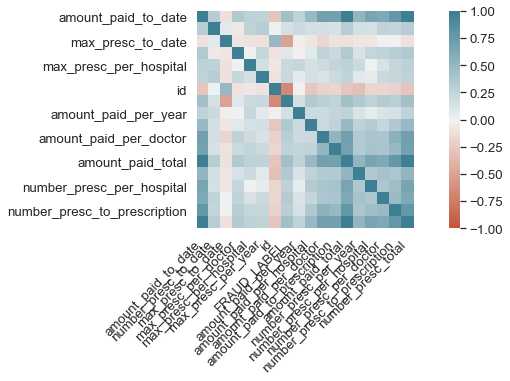

In [94]:
#numerical analysis
#histograms and boxplots for all numerical columns
#scatter plots (seaborn heatmaps)
def numcolanalysis(df):
    #correlation  matrix
    corr = df.corr()
    ax = sns.heatmap(
    corr, 
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(20, 220, n=200),
    square=True
    )

    ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right'
    
    );
    numcols = df.select_dtypes(include=np.number)
    

        
print (numcolanalysis(df))

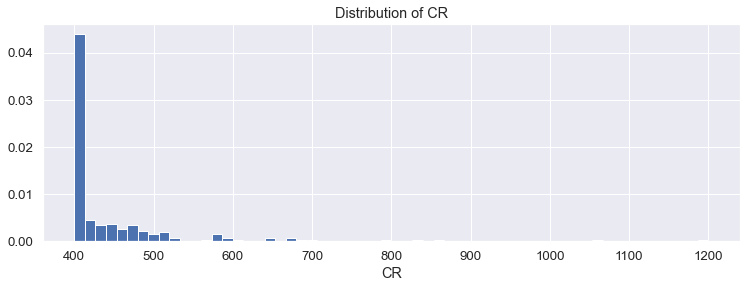

In [95]:
figsize(12.5, 4)
plt.hist(df['number_presc_total'], bins=60, density=True, label='FRAUD_LABEL')
plt.xlabel('CR')
plt.title('Distribution of CR')
plt.show()

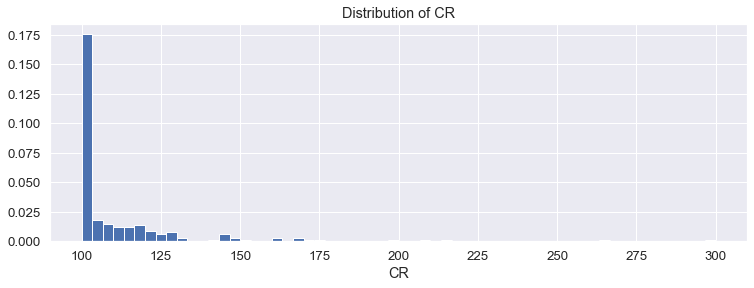

In [96]:
figsize(12.5, 4)
plt.hist(df['amount_paid_to_date'], bins=60, density=True, label='FRAUD_LABEL')
plt.xlabel('CR')
plt.title('Distribution of CR')
plt.show()

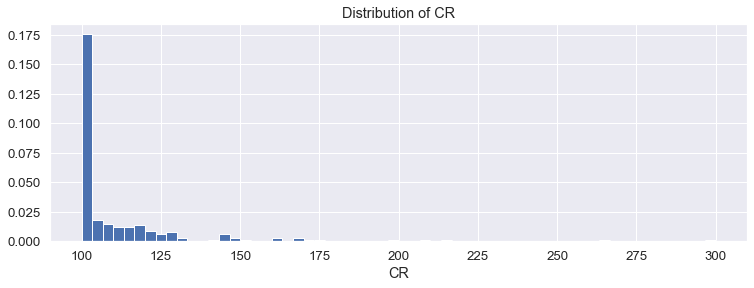

In [97]:
figsize(12.5, 4)
plt.hist(df['amount_paid_to_date'], bins=60, density=True, label='number_presc_total')
plt.xlabel('CR')
plt.title('Distribution of CR')
plt.show()

## Plot to check if linear relations exist between columns

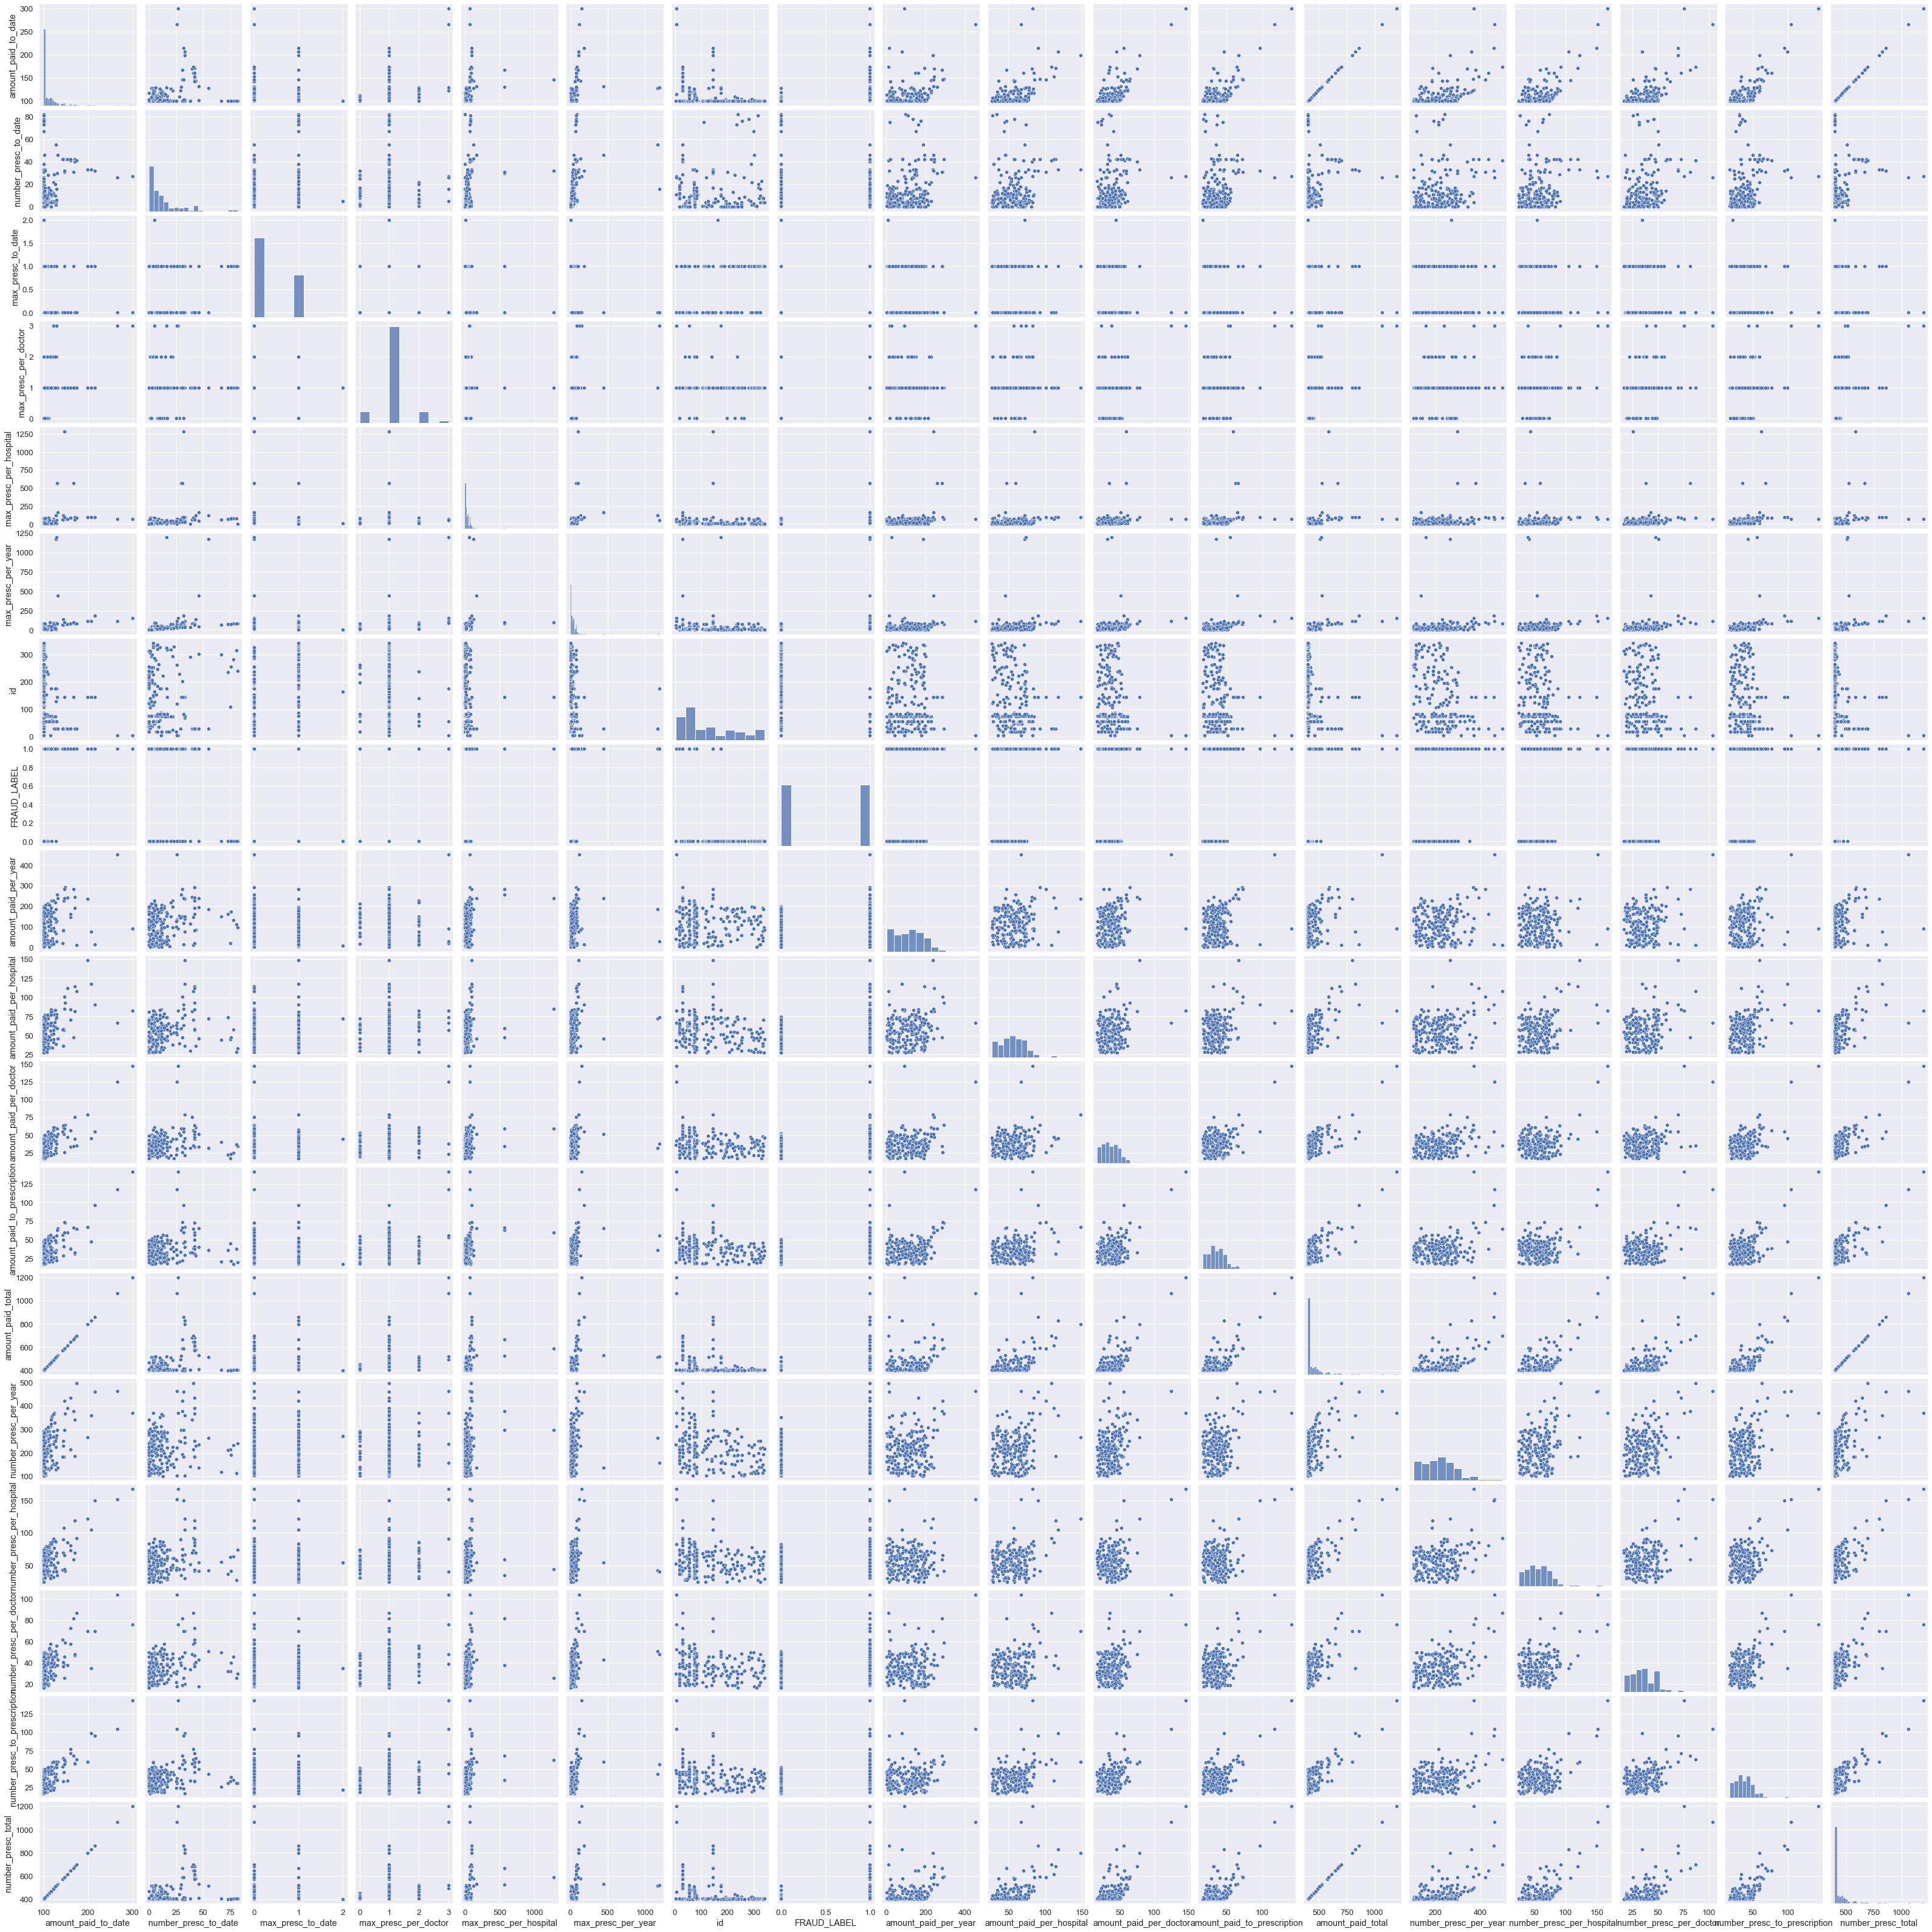

In [98]:
ax=seaborn.pairplot(df)

## OBSERVATION FROM ABOVE PLOT
#### Number of prescription per year and per doctor has a relation and upon general observation columns with geater skewness are affecting label column the most so including them in final dataframe so that only limited but relevant columns are par of the df

### Selecting limited column with most impact to be included in MCMC

In [99]:
df2=df[['amount_paid_to_date','max_presc_per_hospital','max_presc_per_year','amount_paid_total','FRAUD_LABEL']]

df2

# PCA 
#### to check key attributes so that only key columns are selected since MCMC takes too long when number are columns are high

In [100]:
def XY_split(df2):
    #make a copy of the label column and store in y
    y = df2['FRAUD_LABEL'].copy()
    
    #now delete the original
    X = df2.drop('FRAUD_LABEL',axis=1)
    return X, y
#print (XY_split(df22))

In [101]:
def PCAnalysis(df2):
    X,y=XY_split(df2)
    
    X=StandardScaler().fit_transform(X)
    pca=PCA(n_components=2)
    pca_new=pca.fit_transform(X)
    return pca_new
PCAnalysis(df2)


array([[-8.51308899e-01, -1.73704290e-01],
       [-7.72875025e-01, -9.01879082e-02],
       [-8.31637963e-01, -1.83288565e-01],
       [-5.73479436e-01,  2.81874593e-01],
       [-7.29817456e-01,  6.46678730e-02],
       [-7.75322379e-01, -8.89954834e-02],
       [-6.03340674e-01,  6.29182074e-02],
       [-7.18717166e-01, -1.84203997e-01],
       [-7.84054574e-01, -5.56626499e-02],
       [-2.27940275e-01, -9.56672505e-02],
       [-6.09418897e-01,  2.23297761e-01],
       [-5.19686406e-01,  4.22161121e-01],
       [-6.21038175e-01,  2.47861230e-01],
       [-8.17824101e-01, -1.90019096e-01],
       [-4.68030015e-01,  2.85812900e-02],
       [-6.02680134e-01, -1.19009010e-01],
       [-6.37625801e-01,  1.74479143e-01],
       [-4.07581483e-01,  6.65106680e-01],
       [-6.90423913e-01,  5.79865229e-02],
       [-6.45417571e-01,  1.29239403e-01],
       [-7.00463575e-01, -2.53699563e-02],
       [-6.40478897e-01,  1.44236428e-01],
       [-8.03493533e-01, -1.42898388e-01],
       [-8.

In [102]:
df2.tail()

,amount_paid_to_date,max_presc_per_hospital,max_presc_per_year,amount_paid_total,FRAUD_LABEL
195,146.540802,1282,99,586.163207,1.0
196,166.996236,565,99,667.984945,1.0
197,129.295911,58,1193,517.183644,1.0
198,117.001118,13,46,468.004471,1.0
199,126.488742,20,20,505.954969,1.0


C:\Users\iuser\miniconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


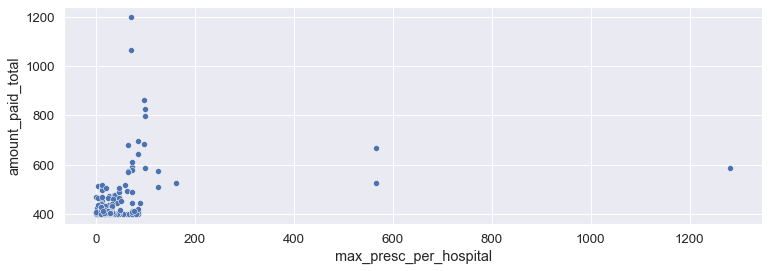

In [103]:
ax=sns.scatterplot(df2['max_presc_per_hospital'], df2['amount_paid_total'])

### Linear Relation between the plots actually selected

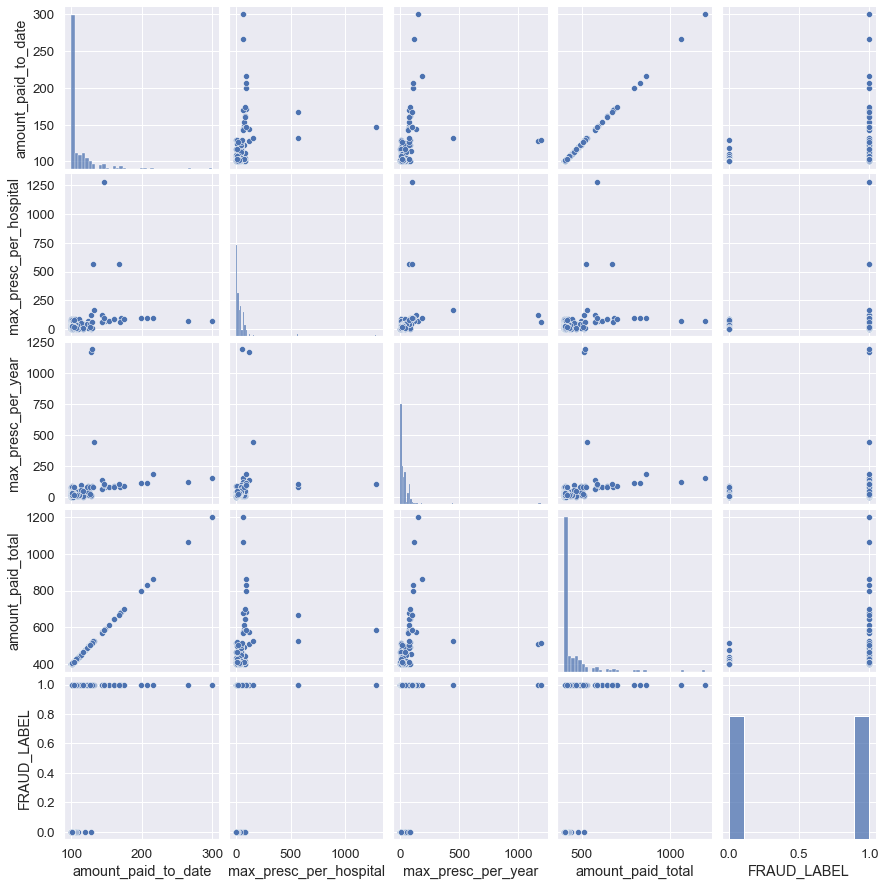

In [104]:
ax=seaborn.pairplot(df2)

### Correlation Matrix

<ipython-input-105-b00c07d0a3f7>:3: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  mask = np.triu(np.ones_like(corr, dtype=np.bool))


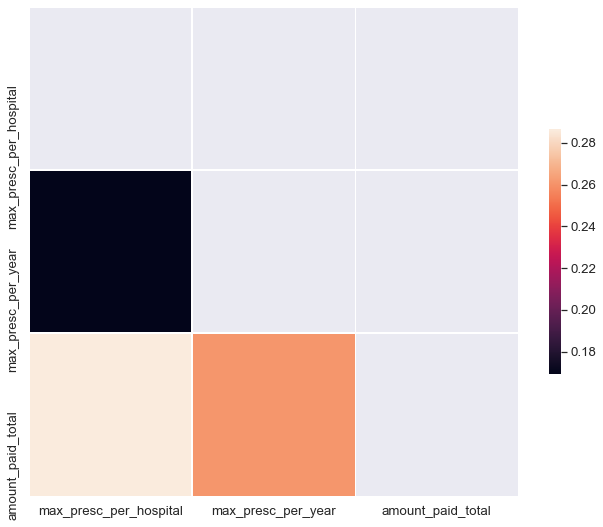

In [105]:
corr=df2.iloc[:, 1:-1].corr()
# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=np.bool))
# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))
# Draw the heatmap with the mask and correct aspect ratio
ax=sns.heatmap(corr, mask=mask,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

# MCMC - Metropolis Hastings

## First-Model With 2500 samples
#### Took > 1 hour

In [106]:
lower=-10**6
higher=10**6
with pm.Model() as first_model:
    #priors on parameters
    beta_0=pm.Uniform('beta_0', lower=lower, upper= higher)
    beta_amntdate=pm.Uniform('beta_amntdate', lower, higher)
    beta_maxh=pm.Uniform('beta_maxh', lower, higher)
    beta_maxy=pm.Uniform('beta_maxy', lower, higher)
    beta_amnttotal=pm.Uniform('beta_amnttotal', lower, higher)


    
    #the probability of belonging to class 1
    p = pm.Deterministic('p', pm.math.sigmoid(beta_0+beta_amntdate*df2['amount_paid_to_date']+
                               beta_maxh*df2['max_presc_per_hospital']+
                               beta_maxy*df2['max_presc_per_year']+
                               beta_amnttotal*df2['amount_paid_total']
                                           ))
with first_model:
    #fit the data 
    observed=pm.Bernoulli("fraud", p, observed=df2['FRAUD_LABEL'])
    start=pm.find_MAP()
    step=pm.Metropolis()
    
    #samples from posterior distribution 
    trace=pm.sample(2500, step=step, start=start)
    burned_trace=trace[1500:]

<ipython-input-106-cca67c584681>:26: FutureWarning: In v4.0, pm.sample will return an `arviz.InferenceData` object instead of a `MultiTrace` by default. You can pass return_inferencedata=True or return_inferencedata=False to be safe and silence this warning.
  trace=pm.sample(2500, step=step, start=start)
Multiprocess sampling (4 chains in 4 jobs)
CompoundStep
>Metropolis: [beta_amnttotal]
>Metropolis: [beta_maxy]
>Metropolis: [beta_maxh]
>Metropolis: [beta_amntdate]
>Metropolis: [beta_0]


Sampling 4 chains for 1_000 tune and 2_500 draw iterations (4_000 + 10_000 draws total) took 1795 seconds.
The rhat statistic is larger than 1.4 for some parameters. The sampler did not converge.
The estimated number of effective samples is smaller than 200 for some parameters.


<ipython-input-107-f8ae0817c982>:1: DeprecationWarning: The function `traceplot` from PyMC3 is just an alias for `plot_trace` from ArviZ. Please switch to `pymc3.plot_trace` or `arviz.plot_trace`.
  pm.traceplot(burned_trace)
Got error No model on context stack. trying to find log_likelihood in translation.
C:\Users\iuser\miniconda3\lib\site-packages\arviz\data\io_pymc3_3x.py:98: FutureWarning: Using `from_pymc3` without the model will be deprecated in a future release. Not using the model will return less accurate and less useful results. Make sure you use the model argument or call from_pymc3 within a model context.
  warnings.warn(
Got error No model on context stack. trying to find log_likelihood in translation.
C:\Users\iuser\miniconda3\lib\site-packages\arviz\stats\density_utils.py:481: UserWarning: Your data appears to have a single value or no finite values
  warnings.warn("Your data appears to have a single value or no finite values")
C:\Users\iuser\miniconda3\lib\site-package

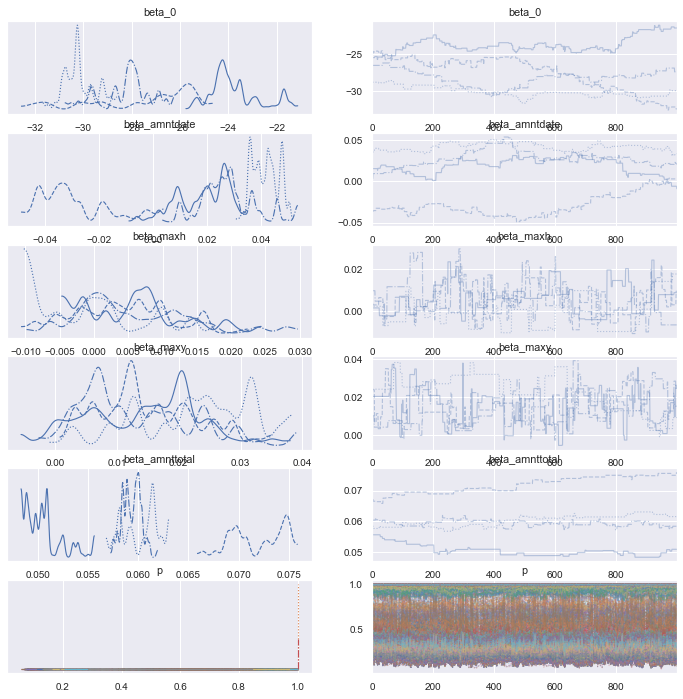

In [107]:
pm.traceplot(burned_trace)
plt.show()

In [108]:
coeffs=['beta_0', 'beta_amnttotal', 'beta_maxy', 'beta_maxh', 'beta_amntdate']
d=dict()
for item in coeffs:
    d[item]=[burned_trace[item].mean()]
    
result_coeffs=pd.DataFrame.from_dict(d)    
result_coeffs
#coeff_result=pd.DataFrame(d)    
#coeff_result

,beta_0,beta_amnttotal,beta_maxy,beta_maxh,beta_amntdate
0,-27.431718,0.060493,0.016176,0.003855,0.014714


### Note: ^coefficients of max precriptions per year and total amount of bill till date is quite close

C:\Users\iuser\miniconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


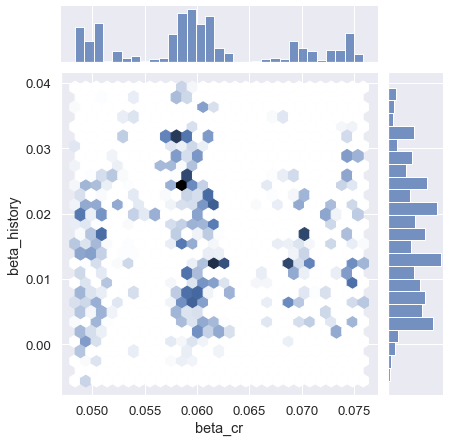

In [109]:
figsize(12.5, 12.5)
seaborn.jointplot(burned_trace['beta_amnttotal'], burned_trace['beta_maxy'], kind="hex") #color="#4CB391")
plt.xlabel("beta_cr")
plt.ylabel("beta_history");

C:\Users\iuser\miniconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


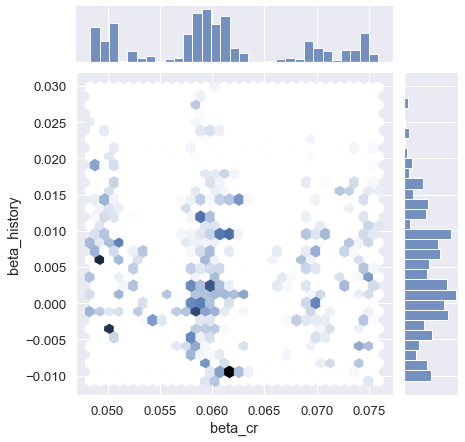

In [110]:
figsize(12.5, 12.5)
seaborn.jointplot(burned_trace['beta_amnttotal'], burned_trace['beta_maxh'], kind="hex") #color="#4CB391")
plt.xlabel("beta_cr")
plt.ylabel("beta_history");

In [111]:
coeffs=['beta_0', 'beta_maxy', 'beta_maxh', 'beta_amnttotal', 'beta_amntdate']
d=dict()
for item in coeffs:
    d[item]=[float(start[item])]
    
map_coeffs=pd.DataFrame.from_dict(d)    
map_coeffs

,beta_0,beta_maxy,beta_maxh,beta_amnttotal,beta_amntdate
0,-27.791317,0.013737,0.004866,0.061318,0.015327


In [112]:
df2.sample(5) 

,amount_paid_to_date,max_presc_per_hospital,max_presc_per_year,amount_paid_total,FRAUD_LABEL
45,106.421354,13,14,425.685417,0.0
134,125.252978,12,45,501.011913,1.0
193,215.452295,97,182,861.809182,1.0
59,100.931770,0,0,403.727082,0.0
7,102.261405,4,4,409.045619,0.0


### Fitting Logistic Regression to laer compare result of mcmc with log regression

In [113]:
from sklearn.linear_model import LogisticRegression
X=df2.iloc[:, 1: -1]
y=df2['FRAUD_LABEL']
logit=LogisticRegression()
logit_model=logit.fit(X,y)
pd.DataFrame(logit_model.coef_, columns=X.columns)

,max_presc_per_hospital,max_presc_per_year,amount_paid_total
0,0.004866,0.013737,0.06514


In [114]:
logit_prediction=logit_model.predict(X)

### Plot of predicting 1 and 0

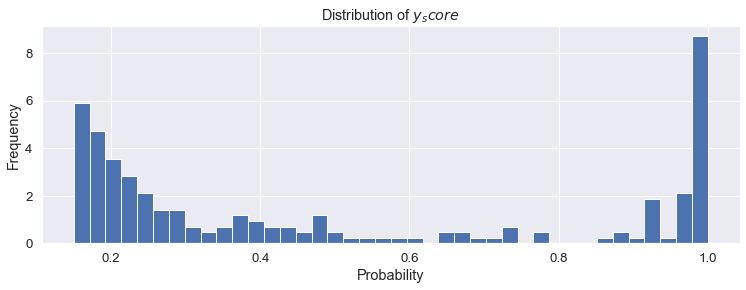

In [115]:
#compute the average probability of predicting 1. 
y_score = np.mean(burned_trace['p'], axis=0)
#histogram of the distribution
figsize(12.5,4)
plt.hist(y_score, bins=40, density=True)
plt.xlabel('Probability')
plt.ylabel('Frequency')
plt.title('Distribution of $y_score$')
plt.show()

## Confuion Matrix and Accuracy and F1-Score of MCMC Model - First Model

In [116]:
first_model_prediction=[1 if x >0.5 else 0 for x in y_score]

In [117]:
first_model_confussion_matrix =confusion_matrix(df2['FRAUD_LABEL'], first_model_prediction)
first_model_confussion_matrix


array([[94,  6],
       [31, 69]], dtype=int64)

In [118]:
import sklearn
from sklearn.metrics import classification_report
print(sklearn.metrics.classification_report(y, first_model_prediction))

              precision    recall  f1-score   support

         0.0       0.75      0.94      0.84       100
         1.0       0.92      0.69      0.79       100

    accuracy                           0.81       200
   macro avg       0.84      0.81      0.81       200
weighted avg       0.84      0.81      0.81       200



#####  Accuracy is 81%

In [119]:
pred_scores = dict(y_true=df2['FRAUD_LABEL'],y_score=y_score)
roc_auc_score(**pred_scores)

0.9067999999999999

##### F1-Score is 90.6%

## Confuion Matrix and Accuracy and F1-Score of Logistic Regression

In [120]:
print(sklearn.metrics.classification_report(y, logit_prediction))


              precision    recall  f1-score   support

         0.0       0.75      0.92      0.83       100
         1.0       0.90      0.69      0.78       100

    accuracy                           0.81       200
   macro avg       0.82      0.80      0.80       200
weighted avg       0.82      0.81      0.80       200



##### 81% same as MCMC

## Second-Model With 6500 samples

### Took Almost 1 hr

In [121]:
lower=-10**6
higher=10**6
with pm.Model() as second_model:
    #priors on parameters
    beta_0=pm.Uniform('beta_0', lower=lower, upper= higher)
    beta_amntdate=pm.Uniform('beta_amntdate', lower, higher)
    beta_maxh=pm.Uniform('beta_maxh', lower, higher)
    beta_maxy=pm.Uniform('beta_maxy', lower, higher)
    beta_amnttotal=pm.Uniform('beta_amnttotal', lower, higher)


    
    #the probability of belonging to class 1
    p = pm.Deterministic('p', pm.math.sigmoid(beta_0+beta_amntdate*df2['amount_paid_to_date']+
                               beta_maxh*df2['max_presc_per_hospital']+
                               beta_maxy*df2['max_presc_per_year']+
                               beta_amnttotal*df2['amount_paid_total']
                                           ))
with second_model:
    #fit the data 
    observed=pm.Bernoulli("fraud", p, observed=df2['FRAUD_LABEL'])
    start=pm.find_MAP()
    step=pm.Metropolis()
    
    #samples from posterior distribution 
    trace=pm.sample(6500, step=step, start=start)
    burned_trace=trace[3000:]

<ipython-input-121-4bd233134d4d>:26: FutureWarning: In v4.0, pm.sample will return an `arviz.InferenceData` object instead of a `MultiTrace` by default. You can pass return_inferencedata=True or return_inferencedata=False to be safe and silence this warning.
  trace=pm.sample(6500, step=step, start=start)
Multiprocess sampling (4 chains in 4 jobs)
CompoundStep
>Metropolis: [beta_amnttotal]
>Metropolis: [beta_maxy]
>Metropolis: [beta_maxh]
>Metropolis: [beta_amntdate]
>Metropolis: [beta_0]


Sampling 4 chains for 1_000 tune and 6_500 draw iterations (4_000 + 26_000 draws total) took 2967 seconds.
The rhat statistic is larger than 1.4 for some parameters. The sampler did not converge.
The estimated number of effective samples is smaller than 200 for some parameters.


<ipython-input-122-f8ae0817c982>:1: DeprecationWarning: The function `traceplot` from PyMC3 is just an alias for `plot_trace` from ArviZ. Please switch to `pymc3.plot_trace` or `arviz.plot_trace`.
  pm.traceplot(burned_trace)
Got error No model on context stack. trying to find log_likelihood in translation.
C:\Users\iuser\miniconda3\lib\site-packages\arviz\data\io_pymc3_3x.py:98: FutureWarning: Using `from_pymc3` without the model will be deprecated in a future release. Not using the model will return less accurate and less useful results. Make sure you use the model argument or call from_pymc3 within a model context.
  warnings.warn(
Got error No model on context stack. trying to find log_likelihood in translation.
C:\Users\iuser\miniconda3\lib\site-packages\arviz\stats\density_utils.py:481: UserWarning: Your data appears to have a single value or no finite values
  warnings.warn("Your data appears to have a single value or no finite values")
C:\Users\iuser\miniconda3\lib\site-package

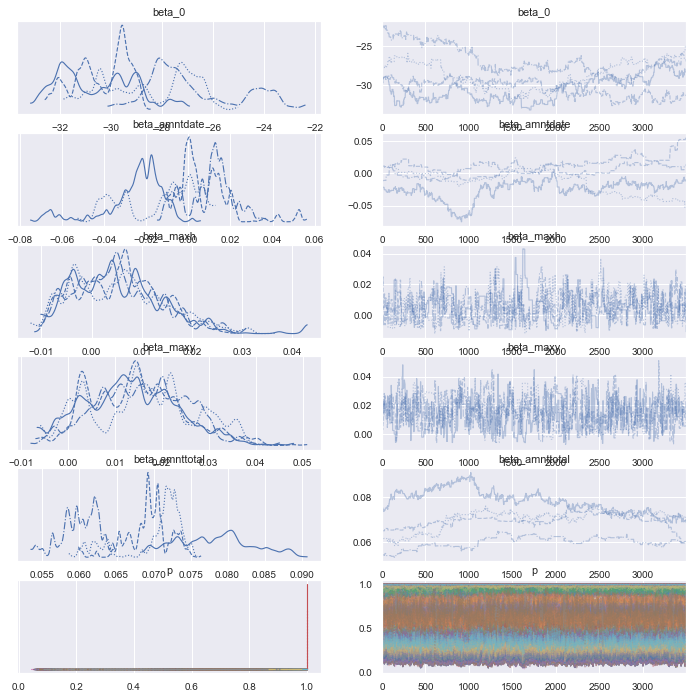

In [122]:
pm.traceplot(burned_trace)
plt.show()

In [123]:
coeffs=['beta_0', 'beta_amnttotal', 'beta_maxy', 'beta_maxh', 'beta_amntdate']
d=dict()
for item in coeffs:
    d[item]=[burned_trace[item].mean()]
    
result_coeffs=pd.DataFrame.from_dict(d)    
result_coeffs
#coeff_result=pd.DataFrame(d)    
#coeff_result

,beta_0,beta_amnttotal,beta_maxy,beta_maxh,beta_amntdate
0,-29.051355,0.069443,0.0149,0.00524,-0.005293


### Note: ^Unlike the first model, the max prescription per year and total amount to date dont have almost similar coefficients

C:\Users\iuser\miniconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


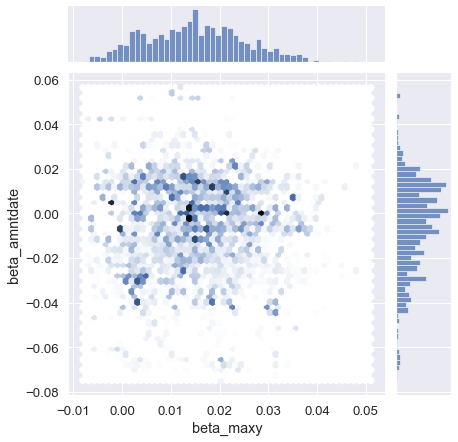

In [124]:
figsize(12.5, 12.5)
seaborn.jointplot(burned_trace['beta_maxy'], burned_trace['beta_amntdate'], kind="hex") #color="#4CB391")
plt.xlabel("beta_maxy")
plt.ylabel("beta_amntdate");

C:\Users\iuser\miniconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


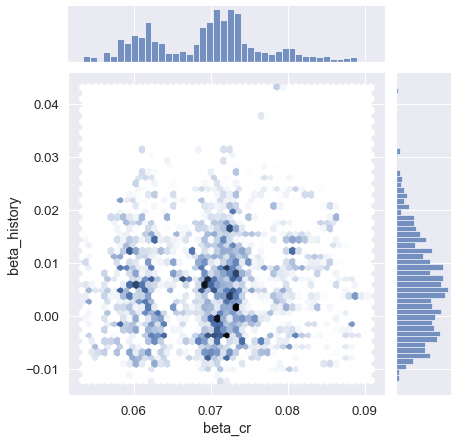

In [125]:
figsize(12.5, 12.5)
seaborn.jointplot(burned_trace['beta_amnttotal'], burned_trace['beta_maxh'], kind="hex") #color="#4CB391")
plt.xlabel("beta_cr")
plt.ylabel("beta_history");

In [126]:
coeffs=['beta_0', 'beta_maxy', 'beta_maxh', 'beta_amnttotal', 'beta_amntdate']
d=dict()
for item in coeffs:
    d[item]=[float(start[item])]
    
map_coeffs=pd.DataFrame.from_dict(d)    
map_coeffs

,beta_0,beta_maxy,beta_maxh,beta_amnttotal,beta_amntdate
0,-27.791317,0.013737,0.004866,0.061318,0.015327


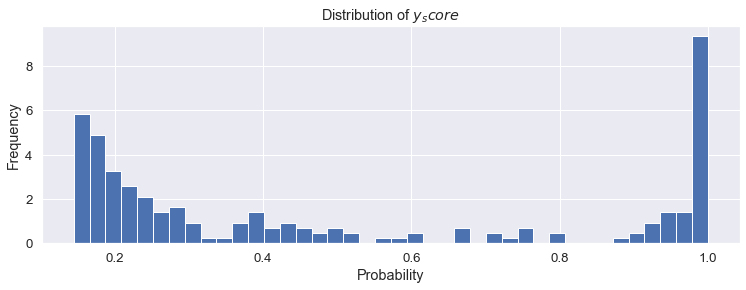

In [127]:
#compute the average probability of predicting 1. 
y_score = np.mean(burned_trace['p'], axis=0)
#histogram of the distribution
figsize(12.5,4)
plt.hist(y_score, bins=40, density=True)
plt.xlabel('Probability')
plt.ylabel('Frequency')
plt.title('Distribution of $y_score$')
plt.show()

In [128]:
second_model_prediction=[1 if x >0.5 else 0 for x in y_score]

## Confuion Matrix and Accuracy and F1-Score of MCMC Model - Second Model

In [130]:
second_model_confussion_matrix =confusion_matrix(df2['FRAUD_LABEL'], second_model_prediction)
second_model_confussion_matrix

array([[92,  8],
       [31, 69]], dtype=int64)

In [131]:
print(sklearn.metrics.classification_report(y, second_model_prediction))

              precision    recall  f1-score   support

         0.0       0.75      0.92      0.83       100
         1.0       0.90      0.69      0.78       100

    accuracy                           0.81       200
   macro avg       0.82      0.80      0.80       200
weighted avg       0.82      0.81      0.80       200



In [132]:
pred_scores = dict(y_true=df2['FRAUD_LABEL'],y_score=y_score)
roc_auc_score(**pred_scores)

0.9062

##### f1 score 90.6%

## Result of First Model to compare with the result of second model above

In [133]:
print(sklearn.metrics.classification_report(y, first_model_prediction))

              precision    recall  f1-score   support

         0.0       0.75      0.94      0.84       100
         1.0       0.92      0.69      0.79       100

    accuracy                           0.81       200
   macro avg       0.84      0.81      0.81       200
weighted avg       0.84      0.81      0.81       200



# Conclusion & Analysis

### In case of Medical fraud file, traditional Algorithms have performed much faster and better with giving almost 100% accuracies.
### MCMC further decreased f1- score, precision and recall on second model with 6500 samples, showing that traditional ML would be the right way to go for this type of dataset.